# Test tree_categories API

Testing the new flexible input_data parameter that accepts either a filename string or an xarray Dataset.

In [7]:
import rioxarray as rxr
from shelterbelts.indices.tree_categories import tree_categories, tree_categories_cmap, tree_categories_labels
from shelterbelts.apis.worldcover import visualise_categories

## Test 1: Using a filename string

In [8]:
# This should work exactly as before
stub = 'g2_26729'
test_filename = f'../data/{stub}_binary_tree_cover_10m.tiff'

ds = tree_categories(test_filename, outdir='../outdir', stub=stub, plot=False)
print(f"Dataset coords: {set(ds.coords)}")
print(f"Dataset vars: {set(ds.data_vars)}")

Saved: ../outdir/g2_26729_categorised.tif
Dataset coords: {'x', 'y', 'spatial_ref'}
Dataset vars: {'tree_categories', 'woody_veg'}


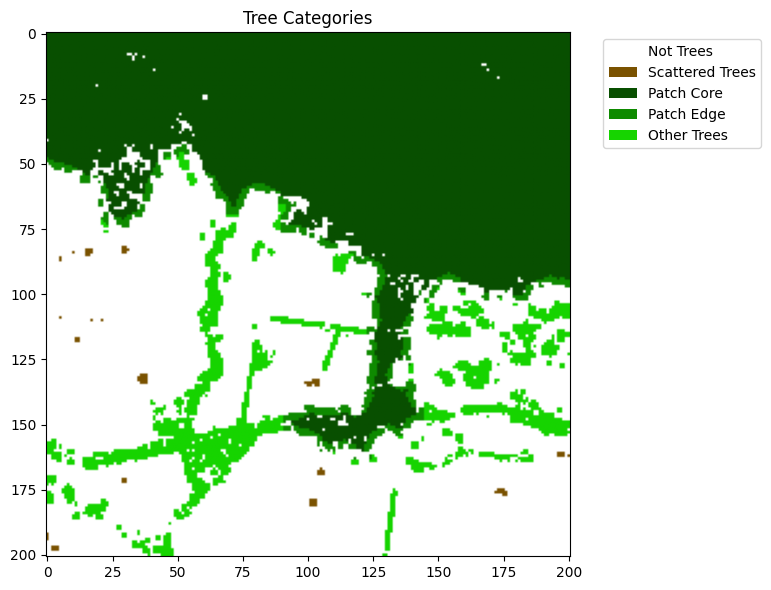

In [9]:
# Visualize the tree categories
visualise_categories(ds['tree_categories'], None, tree_categories_cmap, tree_categories_labels, "Tree Categories")

## Test 2: Using an xarray Dataset

In [10]:
# Load the data as a Dataset first
da = rxr.open_rasterio(test_filename).isel(band=0).drop_vars('band')
ds_input = da.to_dataset(name='woody_veg')

print(f"Input dataset variables: {list(ds_input.data_vars)}")

Input dataset variables: ['woody_veg']


In [11]:
# Pass the Dataset directly - note stub is required
ds = tree_categories(ds_input, outdir='../outdir', stub=f'{stub}_from_ds', plot=False)
print(f"Dataset coords: {set(ds.coords)}")
print(f"Dataset vars: {set(ds.data_vars)}")

Saved: ../outdir/g2_26729_from_ds_categorised.tif
Dataset coords: {'x', 'y', 'spatial_ref'}
Dataset vars: {'tree_categories', 'woody_veg'}


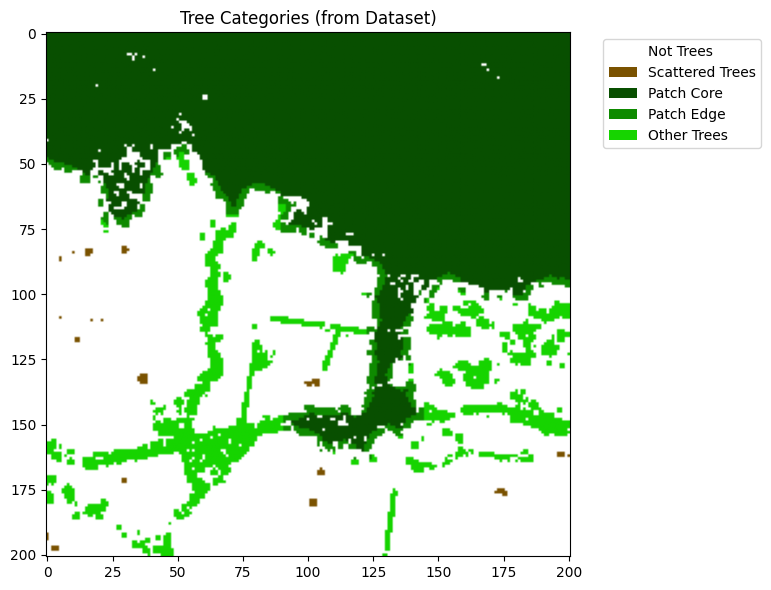

In [12]:
# Visualize the result (same as Test 1, but processed from Dataset)
visualise_categories(ds['tree_categories'], None, tree_categories_cmap, tree_categories_labels, "Tree Categories (from Dataset)")

## Test 3: Chaining operations (no file I/O between steps)

In [13]:
# You can now chain operations without writing/reading files
ds1 = tree_categories(test_filename, outdir='../outdir', stub=f'{stub}_step1', save_tif=False, plot=False)
print("Step 1 complete (no files saved)")

# Use the dataset directly for another operation with different parameters
ds2 = tree_categories(ds1, outdir='../outdir', stub=f'{stub}_step2', edge_size=10, save_tif=False, plot=False)
print("Step 2 complete (edge_size=10 applied)")

print(f"\nFinal dataset vars: {set(ds2.data_vars)}")

Step 1 complete (no files saved)
Step 2 complete (edge_size=10 applied)

Final dataset vars: {'tree_categories', 'woody_veg'}


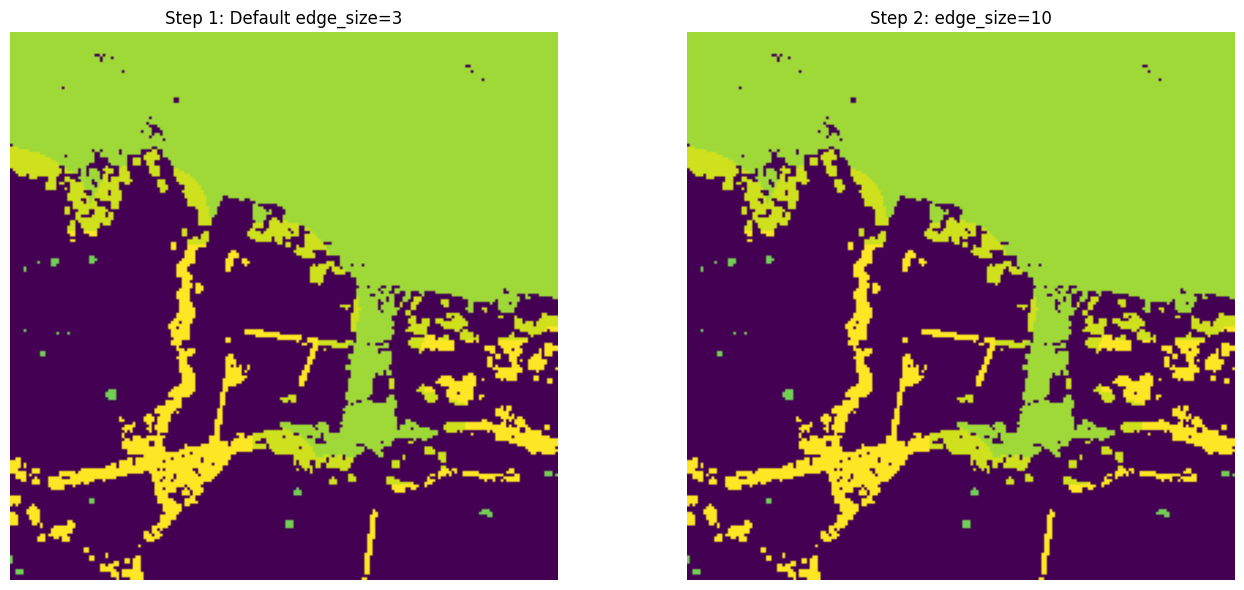

In [14]:
# Compare step 1 (default edge_size=3) vs step 2 (edge_size=10)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Step 1 visualization
im1 = axes[0].imshow(ds1['tree_categories'].values, cmap='viridis')
axes[0].set_title('Step 1: Default edge_size=3')
axes[0].axis('off')

# Step 2 visualization
im2 = axes[1].imshow(ds2['tree_categories'].values, cmap='viridis')
axes[1].set_title('Step 2: edge_size=10')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Test 4: Error handling - missing stub

In [15]:
# This should raise an error because stub is required when passing a Dataset
try:
    ds = tree_categories(ds_input, outdir='../outdir')  # No stub provided
except ValueError as e:
    print(f"Expected error: {e}")

Expected error: stub must be provided when input_data is a Dataset
